In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def MLP_cv_cm_lc_ac(df):

    X = df.drop(columns=['activity'])
    y = df['activity']

    # mlp com hiperparametros otimos
    mlp = MLPClassifier(
        activation="tanh", 
        alpha=0.0001, 
        hidden_layer_sizes=(200, 200), 
        learning_rate="constant", 
        solver="adam", 
        max_iter=1000, 
        early_stopping=True, 
        validation_fraction=0.1
    )

    cv_scores = cross_val_score(mlp, X, y, cv=5)

    print(f'CV Accuracy Scores: {cv_scores}')
    print(f'Mean Accuracy: {cv_scores.mean():.2f}')
    print(f'STD of Accuracy: {cv_scores.std():.2f}')

    mlp.fit(X, y)

    y_pred = mlp.predict(X)

    accuracy = accuracy_score(y, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    print(classification_report(y, y_pred))

    # confusion matrix
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
    fig, ax = plt.subplots(figsize=(12, 8))
    disp.plot(cmap=plt.cm.Blues, ax=ax)

    plt.xticks(rotation=45)
    plt.title('Confusion Matrix')
    plt.show()

    # loss curve
    plt.figure(figsize=(10, 6))
    plt.plot(mlp.loss_curve_)
    plt.title('Loss Curve')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

    # accuracy curve
    if mlp.validation_scores_:
        plt.figure(figsize=(10, 6))
        plt.plot(mlp.validation_scores_, label="Validation Accuracy")
        plt.title('Validation Accuracy Curve')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.grid()
        plt.legend()
        plt.show()


CV Accuracy Scores: [0.85073607 0.83144059 0.73622503 0.94263933 0.80814932]
Mean Accuracy: 0.83
STD of Accuracy: 0.07
Accuracy: 0.92
                  precision    recall  f1-score   support

down_by_elevator       0.80      0.64      0.71     10265
      going_down       0.96      0.97      0.96     10134
        going_up       0.97      0.97      0.97     10199
         running       0.99      0.99      0.99     13020
         sitting       0.99      0.99      0.99     10266
    sitting_down       0.98      0.97      0.98      5253
        standing       0.98      0.99      0.99     10019
     standing_up       0.98      0.98      0.98      5695
  up_by_elevator       0.69      0.84      0.76     10205
         walking       0.96      0.95      0.95     10044

        accuracy                           0.92     95100
       macro avg       0.93      0.93      0.93     95100
    weighted avg       0.93      0.92      0.92     95100



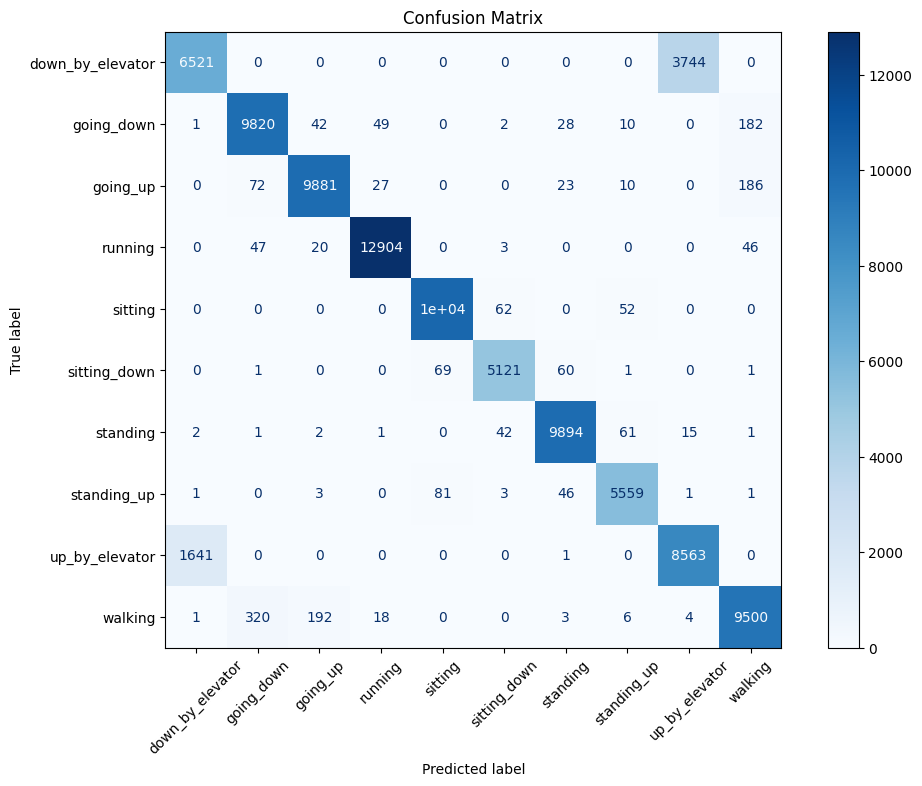

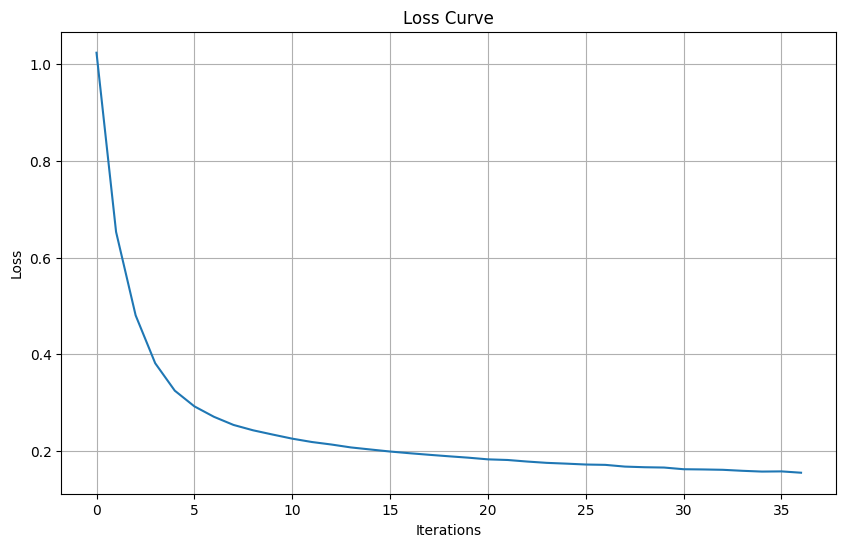

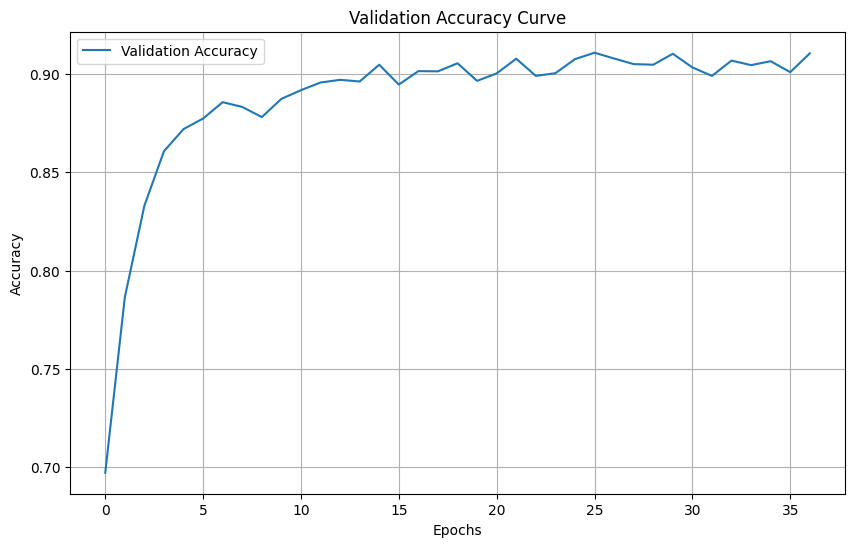

In [2]:
MLP_cv_cm_lc_ac(pd.read_csv('./csv/db_balanced_cf.csv'))

CV Accuracy Scores: [0.77528917 0.76314406 0.66966351 0.91582545 0.70814932]
Mean Accuracy: 0.77
STD of Accuracy: 0.08
Accuracy: 0.85
                  precision    recall  f1-score   support

down_by_elevator       0.99      0.40      0.57     10265
      going_down       0.87      0.84      0.85     10134
        going_up       0.85      0.89      0.87     10199
         running       0.97      0.98      0.98     13020
         sitting       0.80      0.99      0.89     10266
    sitting_down       0.94      0.75      0.83      5253
        standing       0.93      0.98      0.96     10019
     standing_up       0.93      0.69      0.79      5695
  up_by_elevator       0.62      1.00      0.76     10205
         walking       0.90      0.83      0.86     10044

        accuracy                           0.85     95100
       macro avg       0.88      0.83      0.84     95100
    weighted avg       0.88      0.85      0.84     95100



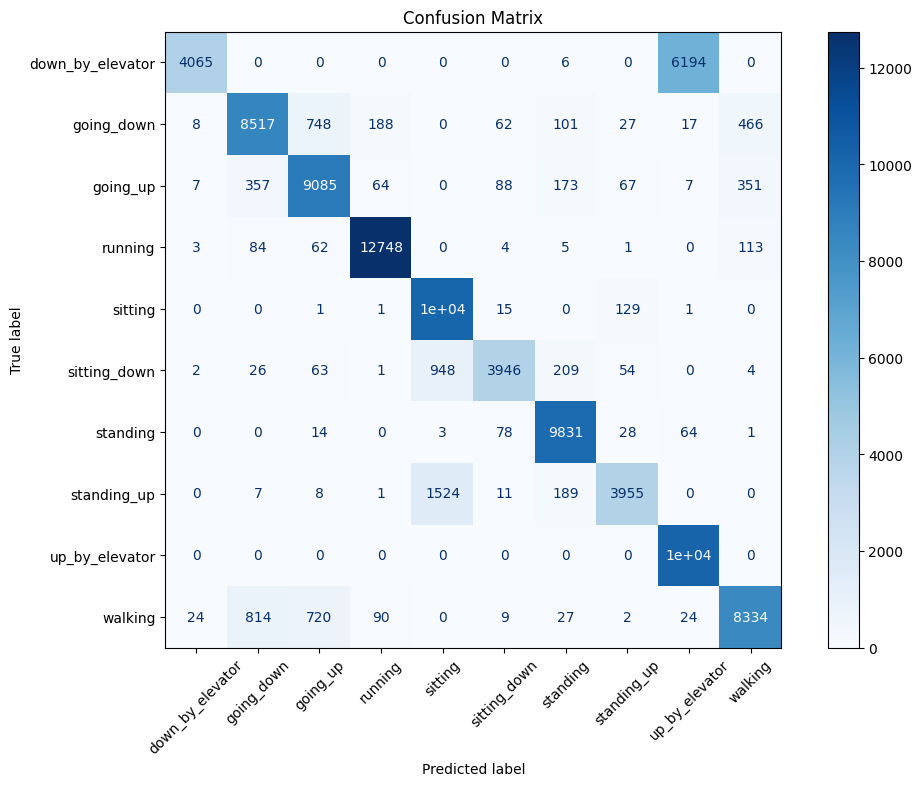

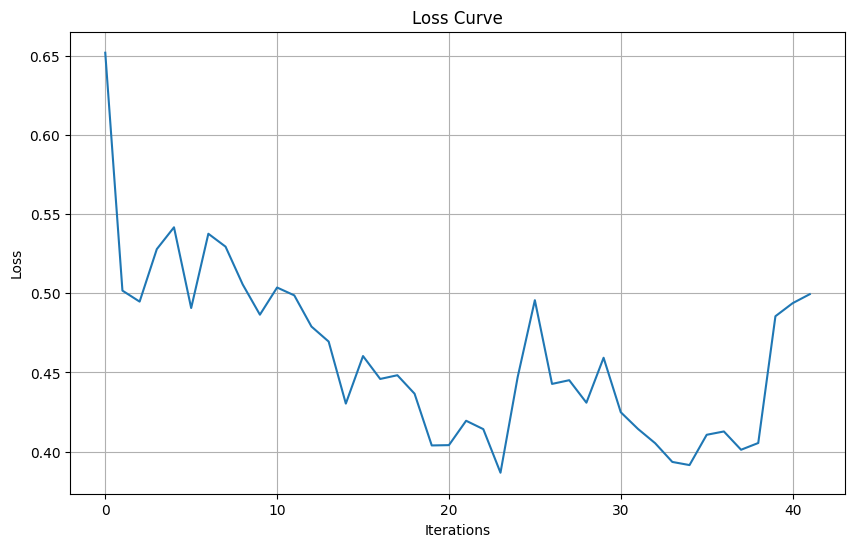

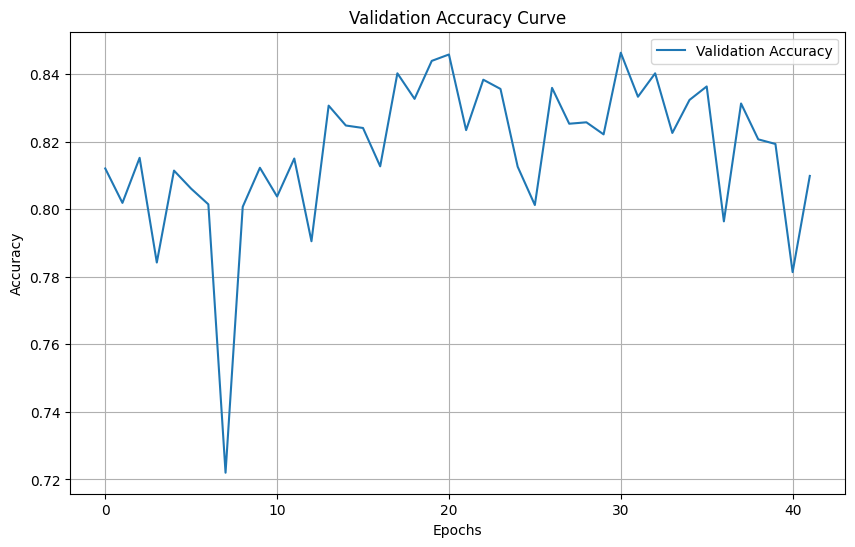

In [3]:
MLP_cv_cm_lc_ac(pd.read_csv('./csv/db_balanced_arima.csv'))

c:\Users\gabbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gabbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gabbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\gabbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization

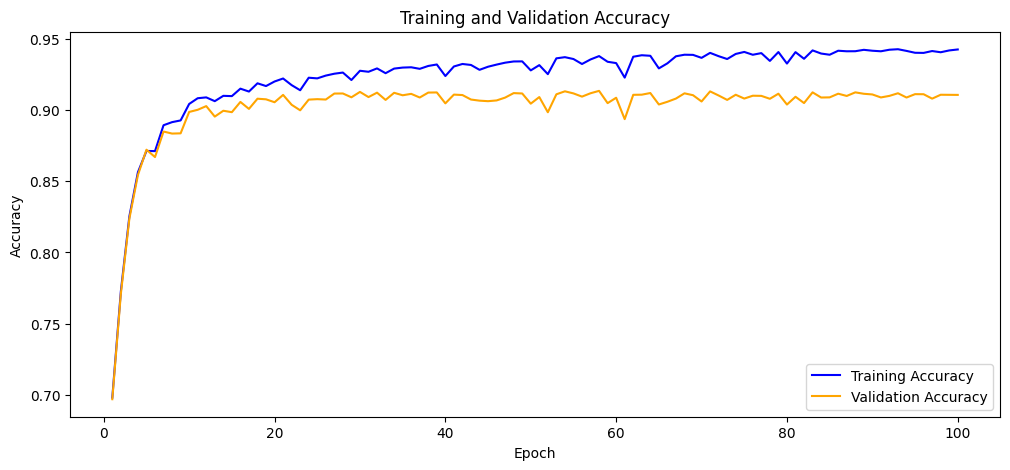

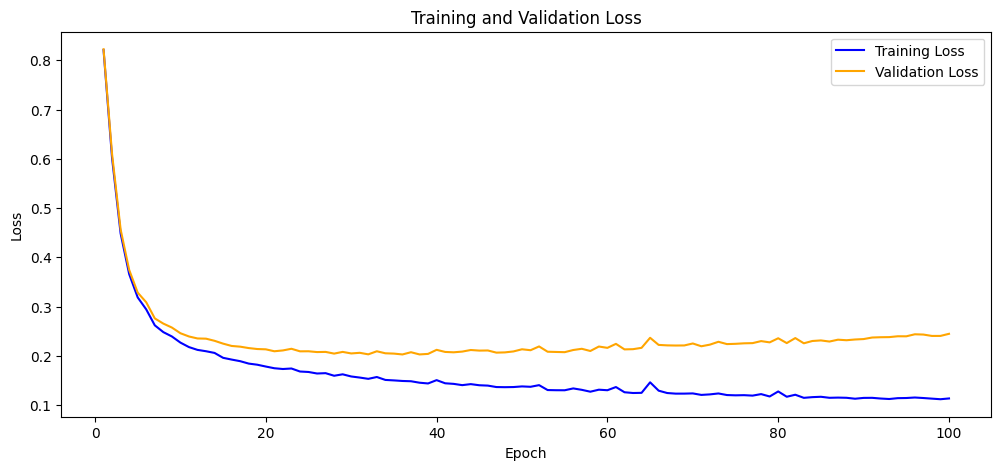

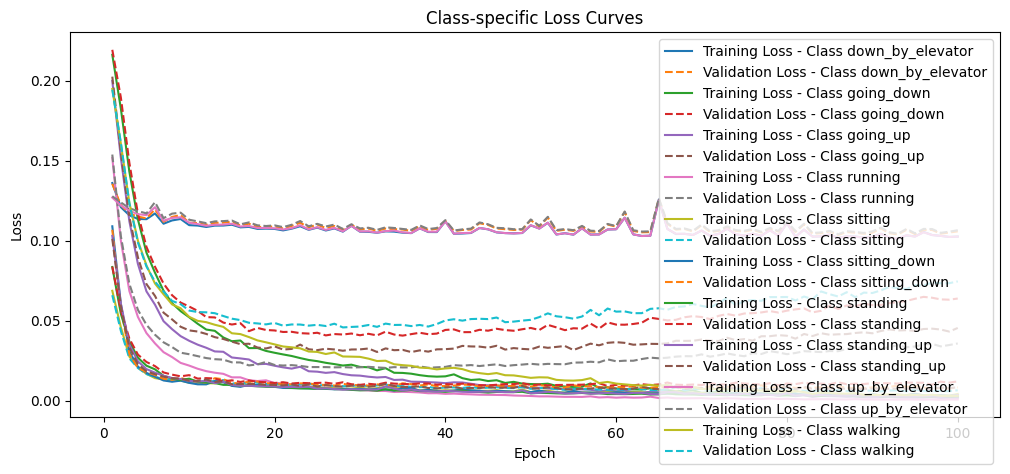

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, log_loss
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./csv/db_balanced_cf.csv')

X = df.drop(columns=['activity'])
y = df['activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(
    activation="tanh", 
    alpha=0.0001, 
    hidden_layer_sizes=(200, 200), 
    learning_rate="constant", 
    solver="adam", 
    max_iter=1, 
    warm_start=True
)

train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []

classes = np.unique(y_train)
class_train_losses = {cls: [] for cls in classes}
class_test_losses = {cls: [] for cls in classes}

epochs = 100

for epoch in range(epochs):
    mlp.fit(X_train, y_train)
    
    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    train_loss = log_loss(y_train, mlp.predict_proba(X_train))
    test_loss = log_loss(y_test, mlp.predict_proba(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    for cls in classes:
        y_train_binary = (y_train == cls).astype(int)
        y_test_binary = (y_test == cls).astype(int)
        
        class_train_loss = log_loss(y_train_binary, mlp.predict_proba(X_train)[:, list(classes).index(cls)], labels=[0, 1])
        class_test_loss = log_loss(y_test_binary, mlp.predict_proba(X_test)[:, list(classes).index(cls)], labels=[0, 1])
        
        class_train_losses[cls].append(class_train_loss)
        class_test_losses[cls].append(class_test_loss)
    
plt.figure(figsize=(12, 5))
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, epochs + 1), test_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss', color='blue')
plt.plot(range(1, epochs + 1), test_losses, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
for cls in classes:
    plt.plot(range(1, epochs + 1), class_train_losses[cls], label=f'Training Loss - Class {cls}')
    plt.plot(range(1, epochs + 1), class_test_losses[cls], label=f'Validation Loss - Class {cls}', linestyle='dashed')
    
plt.title('Class-specific Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
